## Backtesting

## Vectorization with NumPy

In [1]:
v = [1, 2, 3, 4, 5]
sm = [2 * i for i in v]
sm

[2, 4, 6, 8, 10]

In [2]:
2 * v

[1, 2, 3, 4, 5, 1, 2, 3, 4, 5]

In [3]:
import numpy as np

In [5]:
a = np.array(v)
a, type(a)

(array([1, 2, 3, 4, 5]), numpy.ndarray)

In [6]:
2 * a

array([ 2,  4,  6,  8, 10])

In [7]:
0.5 * a + 2

array([2.5, 3. , 3.5, 4. , 4.5])

In [8]:
a = np.arange(12).reshape((4, 3))
a

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [9]:
2 * a

array([[ 0,  2,  4],
       [ 6,  8, 10],
       [12, 14, 16],
       [18, 20, 22]])

In [10]:
a.mean(), np.mean(a)

(5.5, 5.5)

In [11]:
a.mean(axis=0)

array([4.5, 5.5, 6.5])

In [12]:
np.mean(a, axis=1)

array([ 1.,  4.,  7., 10.])

## Vectorization with pandas

In [15]:
import pandas as pd

df = pd.DataFrame(
    data = np.arange(15).reshape(5, 3),
    columns = list("abc"),
    index = pd.date_range("2021-7-1", periods=5, freq="B"),
)

df

,a,b,c
2021-07-01,0,1,2
2021-07-02,3,4,5
2021-07-05,6,7,8
2021-07-06,9,10,11
2021-07-07,12,13,14


In [16]:
2 * df

,a,b,c
2021-07-01,0,2,4
2021-07-02,6,8,10
2021-07-05,12,14,16
2021-07-06,18,20,22
2021-07-07,24,26,28


In [17]:
df.sum()

a    30
b    35
c    40
dtype: int64

In [20]:
df.mean(), np.mean(df)

(a    6.0
 b    7.0
 c    8.0
 dtype: float64,
 a    6.0
 b    7.0
 c    8.0
 dtype: float64)

In [22]:
df["a"] + df["c"]

2021-07-01     2
2021-07-02     8
2021-07-05    14
2021-07-06    20
2021-07-07    26
Freq: B, dtype: int32

In [23]:
0.5 * df.a + 2 * df.b - df.c

2021-07-01     0.0
2021-07-02     4.5
2021-07-05     9.0
2021-07-06    13.5
2021-07-07    18.0
Freq: B, dtype: float64

In [24]:
df['a'] > 5

2021-07-01    False
2021-07-02    False
2021-07-05     True
2021-07-06     True
2021-07-07     True
Freq: B, Name: a, dtype: bool

In [25]:
df[df['a'] > 5]

,a,b,c
2021-07-05,6,7,8
2021-07-06,9,10,11
2021-07-07,12,13,14


## Strategies based on Simple Moving Averages

In [30]:
raw = pd.read_csv(
    'http://hilpisch.com/pyalgo_eikon_eod_data.csv',
    index_col=0,
    parse_dates=True,
).dropna()

raw.head(3)

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-04,30.572827,30.95,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80
2010-01-05,30.625684,30.96,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
2010-01-06,30.138541,30.77,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51


In [32]:
raw.columns

Index(['AAPL.O', 'MSFT.O', 'INTC.O', 'AMZN.O', 'GS.N', 'SPY', '.SPX', '.VIX',
       'EUR=', 'XAU=', 'GDX', 'GLD'],
      dtype='object')

In [33]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2010-01-04 to 2019-12-31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  2516 non-null   float64
 1   MSFT.O  2516 non-null   float64
 2   INTC.O  2516 non-null   float64
 3   AMZN.O  2516 non-null   float64
 4   GS.N    2516 non-null   float64
 5   SPY     2516 non-null   float64
 6   .SPX    2516 non-null   float64
 7   .VIX    2516 non-null   float64
 8   EUR=    2516 non-null   float64
 9   XAU=    2516 non-null   float64
 10  GDX     2516 non-null   float64
 11  GLD     2516 non-null   float64
dtypes: float64(12)
memory usage: 255.5 KB


In [34]:
raw.describe()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
count,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000
mean,110.345280,56.321987,32.489103,676.207625,175.991494,196.259720,1962.609189,16.859344,1.230873,1346.934384,32.006041,129.496983
std,56.172923,33.863544,10.704558,580.441287,42.054584,58.709675,588.910953,5.631575,0.113309,178.932056,14.532685,17.833182
min,27.435687,23.010000,17.665000,108.610000,87.700000,102.200000,1022.580000,9.140000,1.038500,1051.360000,12.470000,100.500000
25%,64.714221,29.560000,23.253750,227.597500,151.002500,138.523750,1384.405000,13.047500,1.123500,1224.262500,21.730000,117.297500
50%,99.480000,44.400000,30.857500,375.137500,169.555000,198.735000,1986.480000,15.470000,1.229500,1293.276150,24.880000,123.680000
75%,150.552500,70.940000,36.902500,967.847500,207.202500,243.360000,2433.967500,18.900000,1.332900,1434.962500,46.120000,138.294975
max,293.650000,158.960000,60.080000,2039.510000,273.380000,322.940000,3240.020000,48.000000,1.482600,1897.100000,66.630000,184.590000


In [37]:
data = raw["EUR="]
data[:3]

Date
2010-01-04    1.4411
2010-01-05    1.4368
2010-01-06    1.4412
Name: EUR=, dtype: float64

In [38]:
type(data)

pandas.core.series.Series

In [39]:
data = pd.DataFrame(data)
type(data)

pandas.core.frame.DataFrame

In [40]:
data.head(3)

,EUR=
Date,
2010-01-04,1.4411
2010-01-05,1.4368
2010-01-06,1.4412


In [42]:
data.rename(columns={'EUR=': 'price'}, inplace=True)
data['SMA1'] = data['price'].rolling(42).mean()
data['SMA2'] = data['price'].rolling(252).mean()

In [44]:
data.tail(3)

,price,SMA1,SMA2
Date,,,
2019-12-27,1.1175,1.107924,1.119428
2019-12-30,1.1197,1.108131,1.119333
2019-12-31,1.1210,1.108279,1.119231


In [45]:
%matplotlib inline
from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'

<AxesSubplot:title={'center':'AAPL stock price | 42 & 252 days SMAs'}, xlabel='Date'>

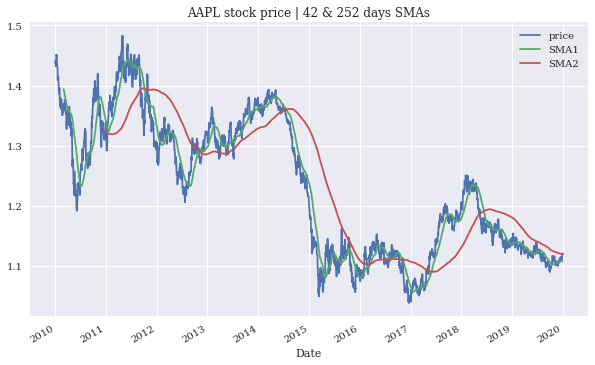

In [46]:
data.plot(
    title='AAPL stock price | 42 & 252 days SMAs',
    figsize=(10, 6),
)

<AxesSubplot:title={'center':'Market Positioning'}, xlabel='Date'>

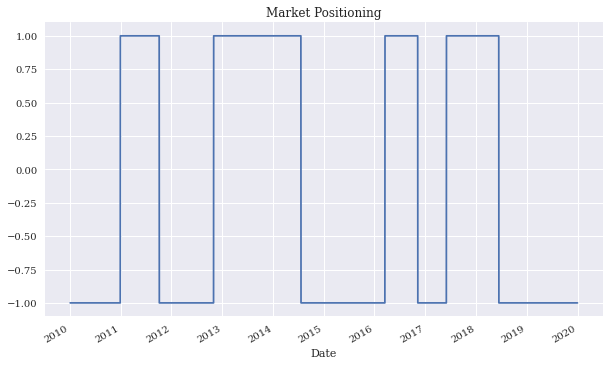

In [47]:
data['position'] = np.where(data['SMA1'] > data['SMA2'], 1, -1)
data['position'].plot(
    ylim=[-1.1, 1.1],
    title='Market Positioning',
    figsize=(10, 6)
)

In [48]:
data['returns'] = np.log(data['price'] / data['price'].shift(1))

<AxesSubplot:>

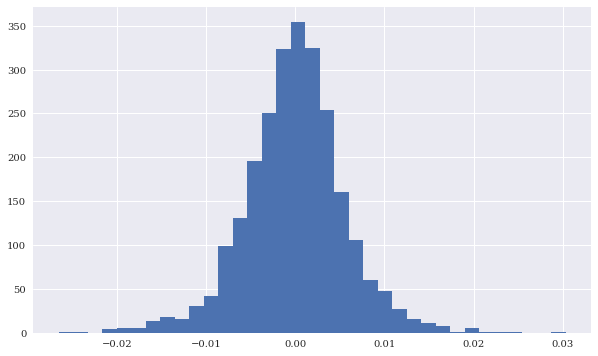

In [49]:
data['returns'].hist(bins=35, figsize=(10, 6))

In [50]:
data['strategy'] = data['position'].shift(1) * data['returns']

In [51]:
data[['returns', 'strategy']].sum()

returns    -0.251186
strategy    0.327576
dtype: float64

In [52]:
data[['returns', 'strategy']].sum().apply(np.exp)

returns     0.777878
strategy    1.387600
dtype: float64

<AxesSubplot:xlabel='Date'>

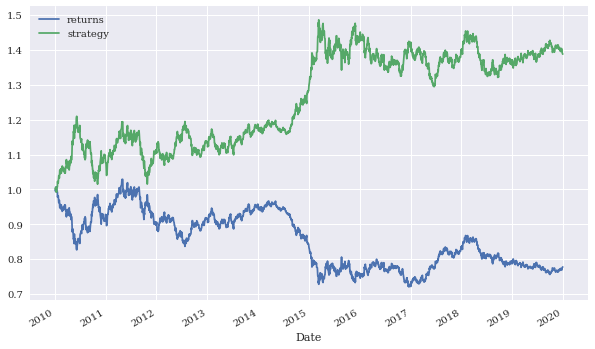

In [53]:
data[['returns', 'strategy']].dropna().cumsum().apply(np.exp).plot(figsize=(10, 6))

In [54]:
data[['returns', 'strategy']].mean() * 252

returns    -0.025168
strategy    0.032823
dtype: float64

In [59]:
((data[['returns', 'strategy']].std() ** 2) * 252) ** 0.5

returns     0.089465
strategy    0.089455
dtype: float64

In [60]:
np.sqrt(data[['returns', 'strategy']].var() * 252)

returns     0.089465
strategy    0.089455
dtype: float64

<AxesSubplot:xlabel='Date'>

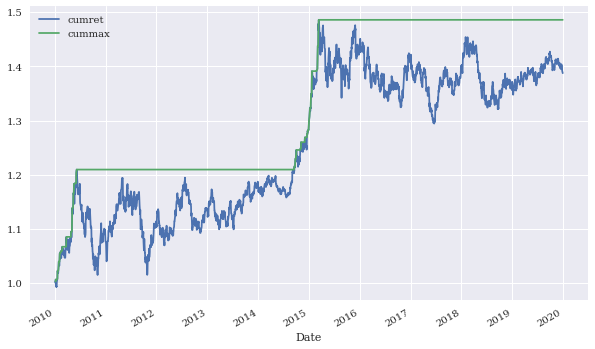

In [61]:
data['cumret'] = data['strategy'].cumsum().apply(np.exp)
data['cummax'] = data['cumret'].cummax()
data[['cumret', 'cummax']].dropna().plot(figsize=(10, 6))

In [62]:
drawdown = data['cummax'] - data['cumret']

In [63]:
drawdown.max()

0.1945832487856176

In [64]:
temp = drawdown[drawdown == 0]

In [65]:
periods = (
    temp.index[1:].to_pydatetime() -
    temp.index[:-1].to_pydatetime()
)

In [66]:
periods[12:15]

array([datetime.timedelta(days=5), datetime.timedelta(days=5),
       datetime.timedelta(days=1)], dtype=object)

In [67]:
periods.max()

datetime.timedelta(days=1563)

## Generalizing the Approach

In [68]:
import SMAVectorBacktester as SMA

In [69]:
smabt = SMA.SMAVectorBacktester(
    'EUR=', 42, 252, '2010-1-1', '2019-12-31'
) 

In [70]:
smabt.run_strategy()

(1.29, 0.45)

In [71]:
%%time
smabt.optimize_parameters(
    (30, 50, 2),
    (200, 300, 2)
)

Wall time: 3.64 s


(array([ 48., 238.]), 1.5)

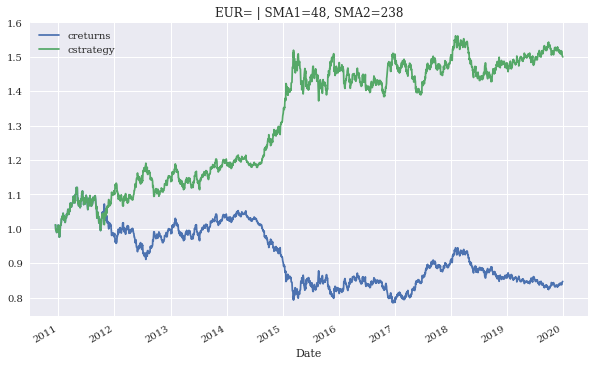

In [72]:
smabt.plot_results()

## Strategies based on Momentum

In [73]:
data = pd.DataFrame(raw['XAU='])

In [74]:
data.rename(columns={'XAU=': 'price'}, inplace=True)

In [75]:
data['returns'] = np.log(data['price'] / data['price'].shift(1))

In [76]:
data['position'] = np.sign(data['returns'])

In [77]:
data['strategy'] = data['position'].shift(1) * data['returns']

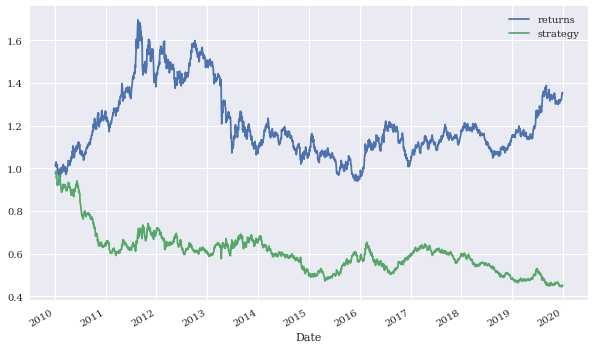

In [80]:
data[['returns', 'strategy']].dropna().cumsum().apply(np.exp).plot(figsize=(10, 6));

In [81]:
data['position'] = np.sign(data['returns'].rolling(3).mean())

In [82]:
data['strategy'] = data['position'].shift(1) * data['returns']

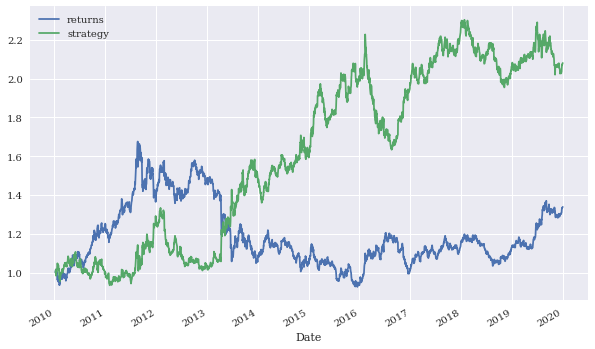

In [83]:
data[['returns', 'strategy']].dropna().cumsum().apply(np.exp).plot(figsize=(10, 6));

## Generalizing the Approach

In [84]:
import MomVectorBacktester as Mom

In [85]:
mombt = Mom.MomVectorBacktester(
    'XAU=', '2010-1-1', '2019-12-31', 10000, 0.0
)

In [86]:
mombt.run_strategy(momentum=3)

(20797.87, 7395.53)

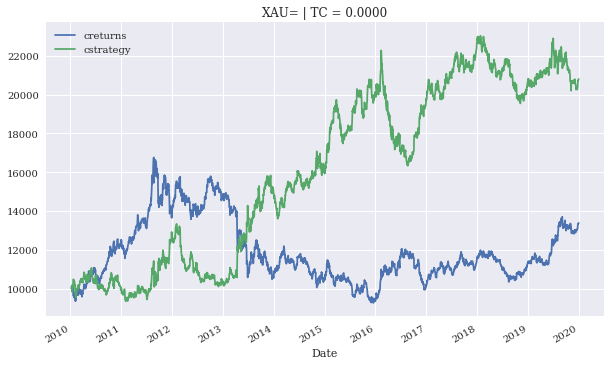

In [87]:
mombt.plot_results()

In [88]:
mombt = Mom.MomVectorBacktester(
    'XAU=', '2010-1-1', '2019-12-31', 10000, 0.001
)

In [89]:
mombt.run_strategy(momentum=3)

(10749.4, -2652.93)

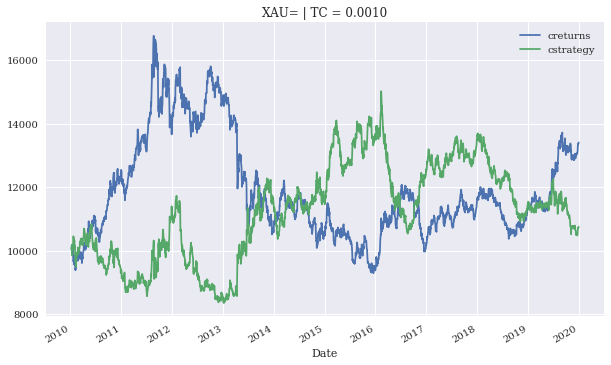

In [90]:
mombt.plot_results()

## Strategies based on Mean-Reversion

In [92]:
data = pd.DataFrame(raw['GDX'])
data.rename(columns={'GDX': 'price'}, inplace=True)
data['returns'] = np.log(data['price'] / data['price'].shift(1))

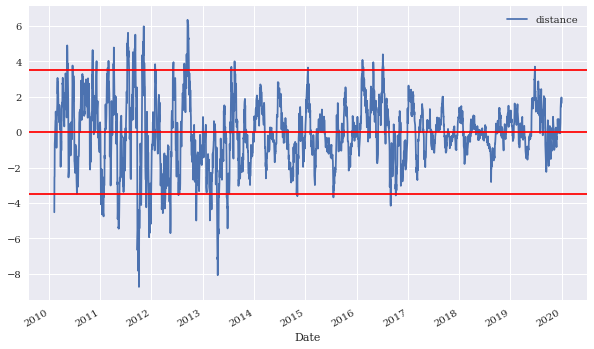

In [93]:
SMA = 25
threshold = 3.5

data['SMA'] = data['price'].rolling(SMA).mean()
data['distance'] = data['price'] - data['SMA']

data['distance'].dropna().plot(figsize=(10, 6), legend=True)
plt.axhline(threshold, color='r')
plt.axhline(-threshold, color='r')
plt.axhline(0, color='r');

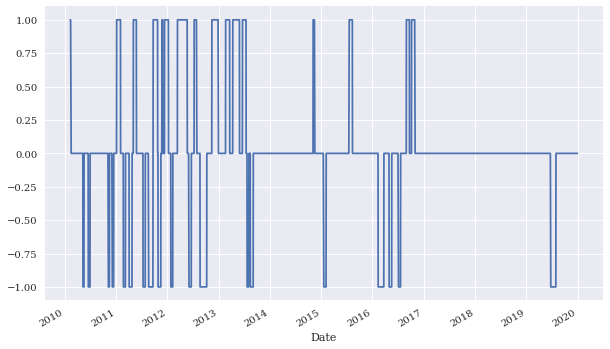

In [97]:
data['position'] = np.where(data['distance'] > threshold, -1, np.nan)
data['position'] = np.where(data['distance'] < -threshold, 1, data['position'])
data['position'] = np.where(
    data['distance'] * data['distance'].shift(1) < 0, 0, data['position']
)
data['position'] = data['position'].ffill().fillna(0)

data['position'].iloc[SMA:].plot(ylim=[-1.1, 1.1], figsize=(10, 6));

In [98]:
data['strategy'] = data['position'].shift(1) * data['returns']

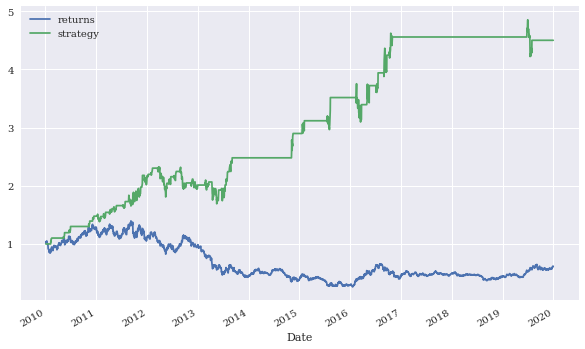

In [99]:
data[['returns', 'strategy']].dropna().cumsum().apply(np.exp).plot(figsize=(10, 6));

## Generalizing the Approach

In [100]:
import MRVectorBacktester as MR

In [101]:
mrbt = MR.MRVectorBacktester('GLD', '2010-1-1', '2019-12-31', 10000, 0.001)

In [102]:
mrbt.run_strategy(SMA=43, threshold=7.5)

(13542.15, 646.21)

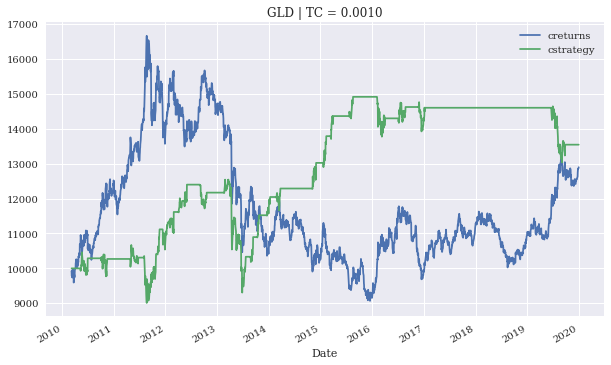

In [103]:
mrbt.plot_results()

***